Sprintの目的
スクラッチを通してK-meansを理解する
クラスタ分析を行う

どのように学ぶか
スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。



In [1226]:
'''雛形
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return


'''


'雛形\nclass ScratchKMeans():\n    """\n    K-meansのスクラッチ実装\n    Parameters\n    ----------\n    n_clusters : int\n      クラスタ数\n    n_init : int\n      中心点の初期値を何回変えて計算するか\n    max_iter : int\n      1回の計算で最大何イテレーションするか\n    tol : float\n      イテレーションを終了する基準となる中心点と重心の許容誤差\n    verbose : bool\n      学習過程を出力する場合はTrue\n    """\n    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):\n        # ハイパーパラメータを属性として記録\n        self.n_clusters = n_clusters\n        self.n_init = n_init\n        self.max_iter = max_iter\n        self.tol = tol\n        self.verbose = verbose\n    def fit(self, X):\n        """\n        K-meansによるクラスタリングを計算\n        Parameters\n        ----------\n        X : 次の形のndarray, shape (n_samples, n_features)\n            訓練データの特徴量\n        """\n        if self.verbose:\n            #verboseをTrueにした際は学習過程を出力\n            print()\n        pass\n    def predict(self, X):\n        """\n        入力されたデータがどのクラスタに属するかを計算\n        """\n        pass\n        return\n\

クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》


1
2
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

学習
K-meansの学習に必要な要素を順番に作成していきます。


【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [-1.73004691  3.43000907]
 [ 1.95870099  0.8332413 ]
 [ 0.39655863  3.95284103]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [-1.47843827  3.25028121]
 [ 1.95870099  0.8332413 ]
 [ 0.87778124  4.28972927]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [-1.43278801  3.27067413]
 [ 1.95870099  0.8332413 ]
 [ 0.94994195  4.32130875]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [-0.6764539   2.52273706]
 [-1.66118727  3.48200834]
 [ 1.44933755  2.64247381]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [-0.68022026  3.00417672]
 [-1.4034682   3.58332154]
 [ 1.57244939  2.4049679 ]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [ 0.05556657  3.68684579]
 [-1.45276439  3.57892048]
 [ 1.78305759  1.991128  ]
 [ 9.29876892 -2.45311503]]
self.cluster_centers_
[[-1.34316029  7.9094545 ]
 [ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:199: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 400x250 with 0 Axes>

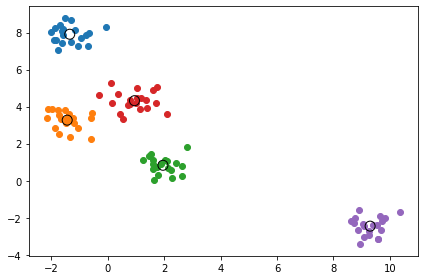

<Figure size 400x250 with 0 Axes>

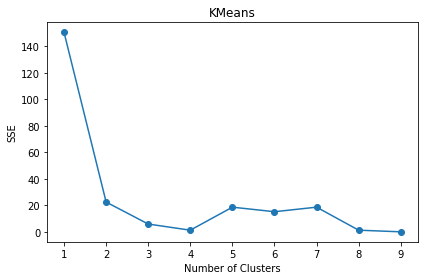

In [1227]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np


class ScratchKMeans(object):
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
        
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose):
      # ハイパーパラメータを属性として記録
        """コンストラクタ

        Args:
            n_clusters (int): クラスタ数
            n_init(int):中心点の初期値を何回変えて計算するか
            max_iter (int): 最大イテレーション数
            tol(float):イテレーションを終了する基準となる中心点と重心の許容誤差
            cluster_centers_(int):セントロイド (重心)
            verbose(bool):学習過程を出力する場合はTrue
            centroidself(int):更新されたセントロイド (重心)を保存していくリスト

        """
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.cluster_centers_ = None
        self.verbose = verbose
        self.centroidself = []

    def fit_predict(self, features):
        """クラスタリングを実施する

        Args:
            features (numpy.ndarray): ラベル付けするデータ

        Returns:
            numpy.ndarray: ラベルデータ
        """
        #【問題１回答】
        # 要素の中からセントロイド (重心) の初期値となる候補をクラスタ数だけ選び出す
        for _ in range(self.n_init):
          feature_indexes = np.arange(len(features))
          np.random.shuffle(feature_indexes)
          initial_centroid_indexes = feature_indexes[:self.n_clusters]
          self.cluster_centers_ = features[initial_centroid_indexes]
          # print("self.cluster_centers_")
          # print(self.cluster_centers_)
          # print(self.cluster_centers_.shape)

        # ラベル付けした結果となる配列はゼロで初期化しておく
        pred = np.zeros(features.shape)

        #【問題5回答】 クラスタリングをアップデートする
        for _ in range(self.max_iter):
            # 各要素から最短距離のセントロイドを基準にラベルを更新する
            new_pred = np.array([
                np.array([
                    self._euclidean_distance(p, centroid)
                    # self._euclidean_distance(p)
                    for centroid in self.cluster_centers_
                ]).argmin() 
                for p in features 
            ])
            
            if np.all(new_pred == pred):
                # 更新前と内容が同じなら終了
                break

            #【問題5回答】中心点 μkと重心の差の合計が指定した許容値以下になる。（雛形では引数tol）
            for p in features:
              for centroid in self.cluster_centers_:
                # if self._euclidean_distance(p, centroid) < self.tol:
                if self._euclidean_distance(p, centroid) < self.tol:
                  break

            pred = new_pred

            # print("pred")
            # print(pred)
            # print("features")
            # print(features)

            
            #【問題４回答】 各クラスタごとにセントロイド (重心) を再計算する
            self.cluster_centers_ = np.array([features[pred == i].mean(axis=0)
                                              for i in range(self.n_clusters)])
            print("self.cluster_centers_")
            print(self.cluster_centers_)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
              self.centroidself.append(self.cluster_centers_) #【問題６】SSEが最小の時の中心値μk保持している
              # print("self.centroidself")
              # print(self.centroidself)
              # k_list = list(range(1, 101))
              # np.sum=self._euclidean_distance(features,self.centroidself)
              # plt.scatter(k_list,np.sum)
              # plt.show()
            for p in features:
              for centroid in self.cluster_centers_:
                self.sse = self._euclidean_distance(p, centroid)
              # self.sse = self._euclidean_distance(features, self.cluster_centers_)
              # self.sse = self._euclidean_distance(features)
           
        return pred

    
    def _euclidean_distance(self, p0, p1):
      return np.sum((p0 - p1) ** 2)

    #【問題2】SSEを求める関数回答
    # def __calc_sse(self, features):
    # def _euclidean_distance(self, features):
    #     """
    #     クラスタ内誤差平方和 (SSE) の計算
    #     """
    #     # print("features")
    #     # print(features)
    #     # print("self.cluster_centers_[k]")
    #     # print(self.cluster_centers_)
    #     sse = 0
    #     for n in range(len(features)):
    #       for k in range(len(self.cluster_centers_)):
    #         # print("features")
    #         # print(features[n])
    #         # print("self.cluster_centers_[k]")
    #         # print(self.cluster_centers_[k])
    #         sse += np.sum((features[n] - self.cluster_centers_[k])**2)
    #     return sse

def main():
    # クラスタ数
    N_CLUSTERS = 5

    # Blob データを生成する
    # dataset = datasets.make_blobs(centers=N_CLUSTERS)
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=100, n_features=2, centers=N_CLUSTERS, cluster_std=0.5, shuffle=True, random_state=0)
    # dataset = datasets.make_blobs(n_samples=100, n_features=2, centers=N_CLUSTERS, cluster_std=0.5, shuffle=True, random_state=0)
    # dataset = datasets.make_blobs(centers=N_CLUSTERS)


    # 特徴データ
    features = X
    # features = dataset[0]
    # 正解ラベルは使わない
    # targets = dataset[1]

    # クラスタリングする
    cls = ScratchKMeans(n_clusters=N_CLUSTERS, n_init=20, max_iter=1000, tol=10, verbose=True)
    pred = cls.fit_predict(features)

    
    fig=plt.figure(figsize=(8, 5), dpi=50)
    fig = plt.figure()
    #【問題7】推定 各要素をラベルごとに色付けして表示する
    for i in range(N_CLUSTERS):
        labels = features[pred == i]
        plt.scatter(labels[:, 0], labels[:, 1])
    
    centers = cls.cluster_centers_
   
    plt.scatter(centers[:, 0], centers[:, 1], s=100,
                facecolors='none', edgecolors='black')
    ax1 = fig.add_subplot(1, 1, 1)
    fig.tight_layout()              #レイアウトの設定
    

    # 【問題8】エルボー法
    fig=plt.figure(figsize=(8, 5), dpi=50)
    fig = plt.figure()
    k_list = list(range(1, 10))
    sse = []
    for k in k_list:
        km = ScratchKMeans(n_clusters=5, n_init=20, max_iter=1000, tol=10, verbose=True)
        km.fit_predict(features)
        sse.append(km.sse)
        print("sse")
        print(sse)
    plt.title('KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.plot(k_list, sse)
    plt.scatter(k_list, sse)
    ax2 = fig.add_subplot(1, 1, 1)
    fig.tight_layout()              #レイアウトの設定
    plt.show()

if __name__ == '__main__':
    main()



【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

<!-- $$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$ -->

$$
SSE=\sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_n-μ_k||^2
$$
  

n
 : データ点のインデックス


k
 : クラスタのインデックス


X
n
 : 
n
番目のデータ点


μ
k
 : 
k
番目の中心点


r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0


クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


中心点 
μ
k
 を固定した上で 
S
S
E
 を最小化する クラスタの割り当て 
r
n
k
 を選ぶ。
クラスタの割り当て 
r
n
k
 を固定した上で 
S
S
E
 を最小化する 中心点 
μ
k
 を選ぶ。

最初の中心点 
μ
k
 は問題1で作成した初期値です。


順番に見ていきます。



In [1228]:
#問題１に回答しました

【問題3】クラスタへの割り当て
すべてのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

$$
∥q−p∥=√(q−p)⋅(q−p)
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [1229]:
import numpy as np
#以下ベクトルp,qの例
vec_p = np.array([1, 2, 3])
vec_q = np.array([2, 3, 4])
print(np.linalg.norm(vec_p - vec_q))

1.7320508075688772


【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられるすべてのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



In [1230]:
#問題１に回答しました

【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）


In [1231]:
#問題１に回答しました

【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

In [1232]:
#問題１に回答しました

【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。


In [1233]:
#問題１に回答しました

【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [1234]:
#問題１に回答しました